In this notebook I will be performing regression using `pyglm.py` with simulated data on different error distributions in the exponential family of GLMs
### Import libraries

In [1]:
import numpy as np
import random
import pyglm as glm
import matplotlib.pyplot as plt

### Gaussian Distribution

Let $Y \sim N(\mu,\sigma^2)$, where the canonical link function is defined as $ \mu = X\beta$

In [2]:
# Simulate a line with Gaussian noise
beta1 = 0.5
beta0 = 1
x1 = np.linspace(1,100,100)

eta = np.zeros(100)
for i in range(0,100):
    eta[i] = random.normalvariate(0,2)

y1 = beta1 * x1 + beta0 + eta

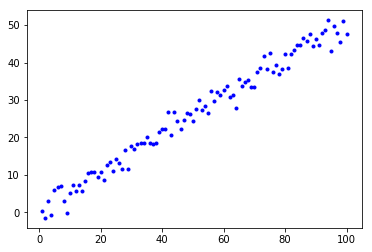

In [3]:
plt.scatter(x1, y1, marker='.', color='b')
plt.show()

In [4]:
# Fit using py-glm

# Newton's method
clf = glm.GLM(distr='gaussian', n_iter=100, descent='newton', lrn_rate = 10)
N = clf.fit(x1 ,y1)

# Batch gradient descent
clf = glm.GLM(distr='gaussian', n_iter=100, descent='bgd', lrn_rate = .001)
B = clf.fit(x1 ,y1)


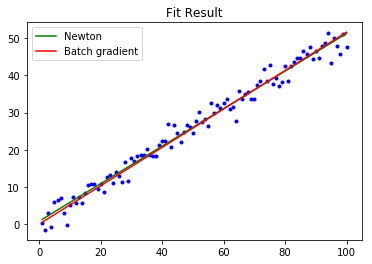

In [5]:
# Plot fit

plt.scatter(x1, y1, marker='.', color='b')
plt.plot(x1, N[1] * x1 + N[0], color='g', label='Newton')
plt.plot(x1, B[1] * x1 + B[0], color='r', label='Batch gradient')
plt.title('Fit Result')
plt.legend()
plt.show()

### Poisson Distribution

Let $Y \sim Poisson(\lambda)$, where the canonical link function is defined as $ \log(\mu) = X\beta$

In [6]:
# Simulate data with Poisson error distribution

x2 = np.linspace(0, 10, 100)

beta0 = 1
beta1 = 0.5

mu = np.exp(beta0 + beta1 * x2)
y2 = np.random.poisson(mu)

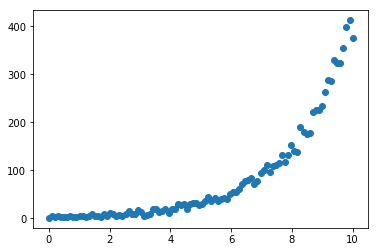

In [7]:
plt.scatter(x2, y2)
plt.show()

In [8]:
# Fit using py-glm

# Newton's method
clf = glm.GLM(distr='poisson', n_iter=100, descent='newton', lrn_rate = 1)
N = clf.fit(x2 ,y2)

# Batch gradient descent
clf = glm.GLM(distr='poisson', n_iter=1000, descent='bgd', lrn_rate = .0001)
B = clf.fit(x2 ,y2)

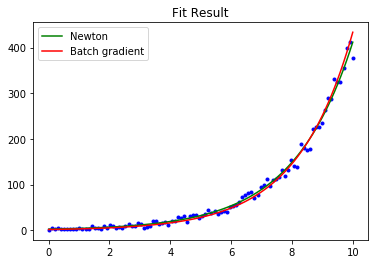

In [9]:
# Plot fit

plt.scatter(x2, y2, marker='.', color='b')
plt.plot(x2, np.exp(N[1] * x2 + N[0]), color='g', label='Newton')
plt.plot(x2, np.exp(B[1] * x2 + B[0]), color='r', label='Batch gradient')
plt.title('Fit Result')
plt.legend()
plt.show()

### Bernoulli Distribution

Let $Y \sim Bernoulli(p)$, where the canonical link function is defined as $ \log(\frac{\mu}{(1 - \mu)}) = X\beta$

In [3]:
x3 = np.random.randn(100)
y3 = np.zeros(100)

z = 1 + 2 * x3
pr = 1 / (1 + np.exp(-z))

for i in range(0, len(z)):
    y3[i] = np.random.binomial(1, pr[i])

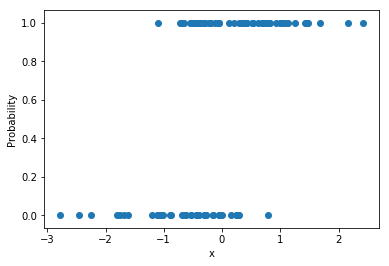

In [4]:
plt.scatter(x3, y3)
plt.xlabel('x')
plt.ylabel('Probability')

plt.show()

In [5]:
# Fit using py-glm

# Newton's method
clf = glm.GLM(distr='categorical', n_iter=1000, descent='newton', lrn_rate = 10)
N = clf.fit(x3 ,y3)

# Batch gradient descent
clf = glm.GLM(distr='categorical', n_iter=1000, descent='bgd', lrn_rate = 3.8)
B = clf.fit(x3 ,y3)


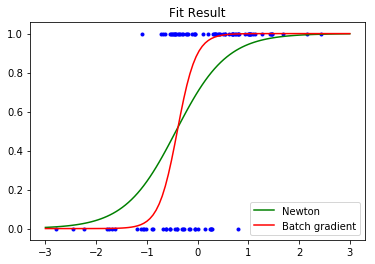

In [6]:
# Plot fit

plt.scatter(x3, y3, marker='.', color='b')

x_fit = np.linspace(-3, 3, 100)
plt.plot(x_fit, 1 / (1 + np.exp(-(N[1] * x_fit + N[0]))), color='g', label='Newton')
plt.plot(x_fit, 1 / (1 + np.exp(-(B[1] * x_fit + B[0]))), color='r', label='Batch gradient')
plt.title('Fit Result')
plt.legend()

plt.show()


### Exponential Distribution

Let $Y \sim Exponential(\lambda)$, where the canonical link function is defined as $ \mu = X\beta^{-1}$

In [7]:
# Simulate data with Exponential error distribution

x4 = np.linspace(1, 10, 100)
y4 = np.zeros(100)

mu = 1 / (1 + 2 * x4)

for i in range(0, len(mu)):
    y4[i] = np.random.exponential(mu[i])


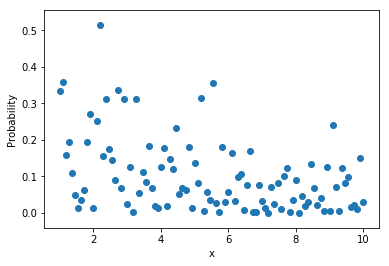

In [8]:
plt.scatter(x4, y4)
plt.xlabel('x')
plt.ylabel('Probability')

plt.show()

In [9]:
# Fit using py-glm

# Newton's method
clf = glm.GLM(distr='exponential', n_iter=1000, descent='newton', lrn_rate=1, beta0_=0, beta_=np.zeros(99))
N = clf.fit(x4, y4)

# Batch gradient descent
clf = glm.GLM(distr='exponential', n_iter=1000, descent='bgd', lrn_rate=.1,beta0_=0, beta_=np.zeros(99))
B = clf.fit(x4, y4)


ValueError: could not broadcast input array from shape (99) into shape (1)

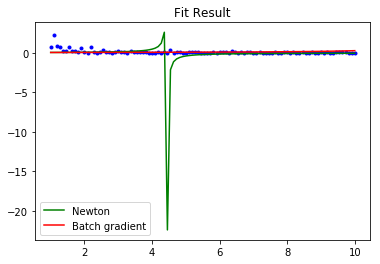

In [33]:
# Plot fit

plt.scatter(x4, y4, marker='.', color='b')
plt.plot(x4, 1 / (N[1] * x4 + N[0]), color='g', label='Newton')
plt.plot(x4, 1 / (B[1] * x4 + B[0]), color='r', label='Batch gradient')
plt.title('Fit Result')
plt.legend()

plt.show()